# Model Building

In [1]:
# Import the neccessary packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy

In [2]:
# Ignore the unnecssary warnings ( like software update, bugs, and so on so fourth)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the display max columns datasets
pd.set_option('display.max_columns',None)

In [4]:
# Read the dataset
data = pd.read_csv('datasets.csv')

In [5]:
# Remove unwanted features in this dataset.
del data['Patient Id']
del data['Family Name']
del data["Father's name"]
del data["Father's age"]
del data["Institute Name"]
del data['Location of Institute']
del data['Status']
del data['Birth asphyxia']
del data['H/O radiation exposure (x-ray)']
del data['History of anomalies in previous pregnancies']
del data['No. of previous abortion']
del data['Birth defects']
del data['Test 1']
del data['Test 2']
del data['Test 3']
del data['Test 4']
del data['Test 5']
del data['Symptom 1']
del data['Symptom 2']
del data['Symptom 3']
del data['Symptom 4']
del data['Symptom 5']
del data['Patient First Name']
del data["Mother's age"]
del data["Autopsy shows birth defect (if applicable)"]
del data["Place of birth"]
del data["Disorder Subclass"]

In [6]:
# Check the top values
data.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O substance abuse,Assisted conception IVF/ART,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder
0,2.0,Yes,No,Yes,No,4.760603,Normal (30-60),Normal,Yes,High,NaN,No,NaN,No,No,9.857562,NaN,Mitochondrial genetic inheritance disorders
1,4.0,Yes,Yes,No,No,4.910669,Tachypnea,Normal,Yes,High,NaN,Yes,Yes,Not applicable,No,5.522560,normal,NaN
2,6.0,Yes,No,No,No,4.893297,Normal (30-60),Tachycardia,Yes,Low,NaN,Yes,No,NaN,Yes,NaN,normal,Multifactorial genetic inheritance disorders
3,12.0,Yes,No,Yes,No,4.705280,Tachypnea,Normal,Yes,High,Male,No,Yes,Not applicable,NaN,7.919321,inconclusive,Mitochondrial genetic inheritance disorders
4,11.0,Yes,No,NaN,Yes,4.720703,Tachypnea,Tachycardia,NaN,Low,Male,No,Yes,Not applicable,Yes,4.098210,NaN,Multifactorial genetic inheritance disorders


In [7]:
# Remove the null values
df = data.dropna()

In [8]:
# Check the total number of null values.
df.isnull().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Parental consent                                    0
Follow-up                                           0
Gender                                              0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O substance abuse                                 0
Assisted conception IVF/ART                         0
White Blood cell count (thousand per microliter)    0
Blood test result                                   0
Genetic Disorder                                    0
dtype: int64

In [9]:
# Transform the datasets  string value into integers values or float value(Label encoder)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

col = ["Patient Age", "Genes in mother's side",'White Blood cell count (thousand per microliter)', 'Paternal gene','Blood cell count (mcL)', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min','Parental consent', 'Follow-up', 'Gender', 'Folic acid details (peri-conceptional)','H/O serious maternal illness', 'H/O substance abuse', 'Assisted conception IVF/ART', 'Blood test result', 'Genetic Disorder','Inherited from father', 'Maternal gene']

for i in col:
    df[i] = le.fit_transform(df[i]).astype(int)

In [10]:
# Check the data relationships
df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate (rates/min,Parental consent,Follow-up,Gender,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O substance abuse,Assisted conception IVF/ART,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder
8,11,0,0,1,0,8092,1,1,0,1,2,1,1,1,0,2841,3,0
9,4,0,1,1,1,1978,1,1,0,1,2,1,0,1,1,2549,0,1
12,1,1,1,0,0,671,0,1,0,0,2,1,0,2,1,4347,3,0
14,6,1,0,1,0,720,1,1,0,0,2,1,1,0,0,0,3,0
18,10,1,1,1,0,1970,0,1,0,1,0,0,0,1,1,5758,0,0


In [11]:
# Check the unique values in specific columns
df['Genetic Disorder'].unique()

array([0, 1, 2])

In [12]:
x1 = df.drop(labels='Genetic Disorder',axis=1)
y1 = df.loc[:,'Genetic Disorder']

In [13]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=1)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 4380, 2: 3311, 1: 904})
OVER SAMPLING DATA COUNT  :  Counter({0: 4380, 1: 4380, 2: 4380})


In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, shuffle=False) 

In [15]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier()
clf.fit(x_train, y_train)
predicted =clf.predict(x_test)


902:	learn: 0.5376952	total: 5.32s	remaining: 571ms
903:	learn: 0.5375262	total: 5.32s	remaining: 565ms
904:	learn: 0.5374090	total: 5.33s	remaining: 559ms
905:	learn: 0.5370114	total: 5.33s	remaining: 553ms
906:	learn: 0.5368398	total: 5.34s	remaining: 548ms
907:	learn: 0.5365592	total: 5.35s	remaining: 542ms
908:	learn: 0.5363852	total: 5.36s	remaining: 536ms
909:	learn: 0.5360579	total: 5.37s	remaining: 531ms
910:	learn: 0.5359220	total: 5.37s	remaining: 525ms
911:	learn: 0.5356103	total: 5.38s	remaining: 519ms
912:	learn: 0.5352715	total: 5.39s	remaining: 514ms
913:	learn: 0.5350891	total: 5.39s	remaining: 508ms
914:	learn: 0.5348928	total: 5.4s	remaining: 502ms
915:	learn: 0.5345509	total: 5.41s	remaining: 496ms
916:	learn: 0.5341382	total: 5.41s	remaining: 490ms
917:	learn: 0.5338352	total: 5.43s	remaining: 485ms
918:	learn: 0.5333730	total: 5.43s	remaining: 479ms
919:	learn: 0.5332080	total: 5.44s	remaining: 473ms
920:	learn: 0.5328935	total: 5.45s	remaining: 467ms
921:	learn: 0

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER:


 [[   0    0    0]
 [  10 1549    0]
 [  25    3 1041]]


In [17]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf, x1, y1, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [46.36416521 47.1785922  45.89877836 46.36416521 47.06224549]


In [18]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF BAGGING CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF BAGGING CLASSIFIER IS : 98.55403348554034


In [19]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)

print("THE HAMMING LOSS OF BAGGING CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF BAGGING CLASSIFIER IS : 1.445966514459665


In [20]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predicted)
print("Classification Report\n\n",report)

Classification Report

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      1.00      1559
           2       1.00      0.97      0.99      1069

    accuracy                           0.99      2628
   macro avg       0.67      0.66      0.66      2628
weighted avg       1.00      0.99      0.99      2628



THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER:


[[   0    0    0]
 [  10 1549    0]
 [  25    3 1041]]


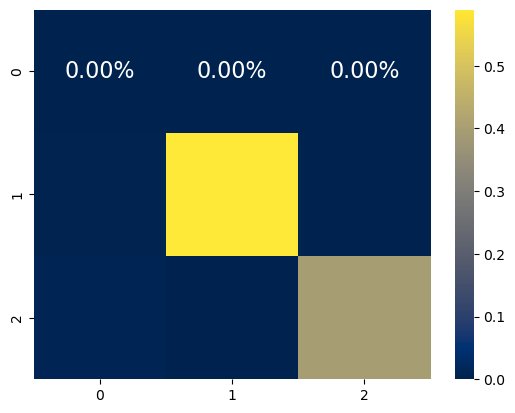

In [21]:
import numpy as np
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF BAGGING CLASSIFIER:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'cividis', annot_kws={"size": 16},fmt='.2%')
plt.show()

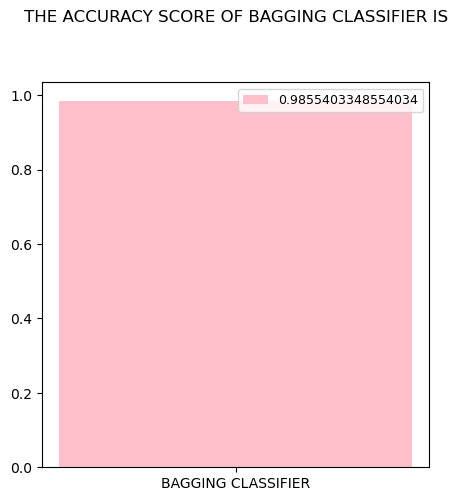

In [23]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="BAGGING CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("pink"))
    plt.title("THE ACCURACY SCORE OF BAGGING CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()